<h1 style = "text-align:center"> Scikit-Learn</h1>


### Reasons:
1. based on NumPy and MatPlotLib
2. Has many built-in ML models
3. Methods to Evaluate ML Models
4. Very well design API

## Sklearn Workflow:
1. Get ready
2. Choose a Model
3. Fit model to data and make prediction
4. Evaluate the model
5. Imporve with experimentation
6. Save and Reload the data

## 1. Scikit-learn Introduction

In [1]:
# 1. Get ready
import numpy as np
import pandas as pd
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Create X (the feature matrix)
X = heart_disease.drop('target',axis =1)
# Create Y (Labels)
y = heart_disease.target

In [4]:
#2. Choose the right model and hyperparameters

X,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [5]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
#3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [7]:
clf.fit(X_train,y_train);

In [8]:
#4. make a prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [9]:
#4. Evaluate the model
clf.score(X_train,y_train)

1.0

In [10]:
clf.score(X_test,y_test)

0.7868852459016393

In [11]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.74      0.90      0.81        31

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



In [12]:
confusion_matrix(y_test,y_preds)

array([[20, 10],
       [ 3, 28]], dtype=int64)

In [13]:
accuracy_score(y_test,y_preds)

0.7868852459016393

In [14]:
# 5. Improve the model
# trying different range of n_estimators
np.random.seed(100)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train,y_train)
    print(f"Model accuracy on test data {clf.score(X_test,y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators
Model accuracy on test data 75.41%

Trying model with 20 estimators
Model accuracy on test data 80.33%

Trying model with 30 estimators
Model accuracy on test data 75.41%

Trying model with 40 estimators
Model accuracy on test data 77.05%

Trying model with 50 estimators
Model accuracy on test data 73.77%

Trying model with 60 estimators
Model accuracy on test data 78.69%

Trying model with 70 estimators
Model accuracy on test data 75.41%

Trying model with 80 estimators
Model accuracy on test data 77.05%

Trying model with 90 estimators
Model accuracy on test data 77.05%



In [15]:
#6. Save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model.pkl",'wb'))

In [16]:
loaded_model = pickle.load(open("random_forest_model.pkl",'rb'))
loaded_model

RandomForestClassifier(n_estimators=90)

In [17]:
loaded_model.score(X_test,y_test)

0.7704918032786885

In [18]:
X_test.iloc[30]

age          59.0
sex           1.0
cp            0.0
trestbps    110.0
chol        239.0
fbs           0.0
restecg       0.0
thalach     142.0
exang         1.0
oldpeak       1.2
slope         1.0
ca            1.0
thal          3.0
Name: 206, dtype: float64

In [19]:
loaded_model.predict(np.array(X_test.iloc[21]).reshape(1, -1))

array([1], dtype=int64)

In [20]:
loaded_model.score(X_train,y_train)

1.0

## Step 1. Getting the Data Ready
Three main things we have to do:
1. Splitting our data into features and labels('X','y')
2. Filling/imputing or disregarding missing values
3. Coverting non-numeric data to numerica also called as feature encoding

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
X = heart_disease.drop('target',axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = heart_disease.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# 1. split data into training and test set
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2) #test_size = 0.2 means 20% for test and 80% for training set

In [25]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [26]:
# 1.1 Making sure data is numerical
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [27]:
len(car_sales)

1000

In [28]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
X = car_sales.drop('Price',axis = 1)

In [30]:
y = car_sales.Price

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [32]:
#turning non-numeric to numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot  = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder = 'passthrough')
transformedX = transformer.fit_transform(X)
transformedX

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [33]:
pd.DataFrame(transformedX)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [34]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [35]:
np.random.seed(45)
X_train,X_test,y_train,y_test = train_test_split(transformedX,
                                                y,
                                                test_size = 0.2)


In [36]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.24144326574887465

## Dealing With Missing values.

1. Fill with some value called as imputation
2. Removing samples with missing data altogether.

In [37]:
#import car sales missing data
car_sales_missing = pd.read_csv('../ML Course/data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [38]:
#viewing missing data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
X = car_sales_missing.drop('Price',axis = 1)
y = car_sales_missing.Price

In [40]:
#convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot  = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder = 'passthrough')
transformedX = transformer.fit_transform(X)
transformedX

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

## Option 1. fill missing data with pandas.

In [41]:

X.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
dtype: int64

In [42]:
car_sales_missing.Make.fillna('missing',inplace = True)
car_sales_missing.Colour.fillna('missing',inplace = True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True)
car_sales_missing.Doors.fillna(4,inplace = True)

In [43]:
car_sales_missing.dropna(inplace = True)

In [44]:
X = car_sales_missing.drop('Price',axis = 1)

In [45]:
y = car_sales_missing.Price

In [46]:
#convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot  = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder = 'passthrough')
transformedX = transformer.fit_transform(car_sales_missing)
transformedX

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Option 2: Handling missing values with sckitlearn

In [47]:
#import car sales missing data
car_sales_missing = pd.read_csv('../ML Course/data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [48]:
#drop rows with missing labels
y = car_sales_missing.dropna(subset = ['Price'],inplace = True)

In [49]:
X = car_sales_missing.drop('Price',axis = 1)
y = car_sales_missing.Price

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categrical values with 'missing' and numerical values with mean()
cat_imputer = SimpleImputer(strategy = 'constant',fill_value= 'missing')
door_imputer = SimpleImputer(strategy ='constant', fill_value = 4)
num_imputer = SimpleImputer(strategy = 'mean')

#define columns
cat_feature = ['Make','Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

#create imputer
imputer = ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_feature),
    ('door_imputer',door_imputer,door_feature),
    ('num_imputer',num_imputer,num_feature)
])


#transform data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [51]:
type(filled_X)

numpy.ndarray

In [52]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns = ['Make','Colour','Doors','Odometer (KM)'])

In [53]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [54]:
#convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot  = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder = 'passthrough')
transformedX = transformer.fit_transform(car_sales_filled)
transformedX

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [55]:
#fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformedX,y,
                                                test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

## 2. Choosing the right estimator/alogorithm
Scikitlearn uses estimator instead of ML Model/Algorithm

* Classification- Predicting whether a sample is one thing or another
* Regression- Predicting numbers

Step 1- Check the scikitlearn map...
https://scikit-learn.org/stable/modules/ensemble.html

#### 2.1 Picking a ML model for a regression problem.

In [56]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [57]:
boston_df = pd.DataFrame(boston['data'],columns =boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [58]:
#let's try Ridge Regression model
from sklearn.linear_model import Ridge

#1. define features and labels
X = boston_df.drop('target',axis = 1)
y = boston_df['target']

#2. split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#3. instantiate Ridge
model = Ridge()
model.fit(X_train,y_train)

#4. test our model
model.score(X_test,y_test)


0.7090891763702278

How can we improve the score?

what if Ridge wasn't wroking

In [59]:
#now we will try ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#defining randoms seed
np.random.seed(49)

#1. define features and labels
X = boston_df.drop('target',axis = 1)
y = boston_df['target']

#2. split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#3. instantiate Ridge
clf = RandomForestRegressor(n_estimators = 100)
clf.fit(X_train,y_train)

#4. test our model
clf.score(X_test,y_test)

0.8818706461469102

In [60]:
#check the ridge model again
model.score(X_test,y_test)

0.738233751301743

## Fitting the data on Model and making predictions

In [61]:
#importing the data
hd = pd.read_csv('data/heart-disease.csv')
#viewing the head of data
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
#missing values?
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

we have no missing values.

In [63]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#splitting data to features and labels
X = hd.drop('target',axis = 1)
y = hd['target']

#splitting to train and test sets

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

#fitting the model
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

#testing the model

clf.score(X_test,y_test)

0.8524590163934426

`predict()` can also be used for regression models

In [65]:
y_preds = clf.predict(X_test)

In [66]:
y_preds

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [67]:
y_preds[:10]

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#defining randoms seed
np.random.seed(49)

#1. define features and labels
X = boston_df.drop('target',axis = 1)
y = boston_df['target']

#2. split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#3. instantiate Ridge
clf = RandomForestRegressor()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
#4. test our model
y_preds = clf.predict(X_test)

0.8818706461469102


In [69]:
y_preds[:10]

array([15.249, 20.942, 23.975, 19.667, 14.821, 15.074, 24.903, 21.578,
       26.222, 22.912])

In [70]:
np.array(y_test[:10])

array([23.2, 21.7, 22.6, 18.5, 15.4, 13.8, 25. , 18.5, 22.8, 23. ])

In [71]:
#compare prediction with truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.4178333333333333

it means our prediction is 2.41 away from actual value

There are two ways to predict:

   1.`predict()`

2. `predict_proba()`

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#defining randoms seed
np.random.seed(12)

#1. define features and labels
X = heart_disease.drop('target',axis = 1)
y = heart_disease['target']

#2. split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#3. instantiate Ridge
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
clf.predict(X_test)

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
np.array(y_test)

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [75]:
#compare predictions
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8360655737704918

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8360655737704918

In [77]:
#predict_proba()->returns probabilities of a classification label
clf.predict_proba(X_test[:10])

array([[0.17, 0.83],
       [0.42, 0.58],
       [0.02, 0.98],
       [0.79, 0.21],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.47, 0.53],
       [0.8 , 0.2 ],
       [0.91, 0.09],
       [0.72, 0.28]])

In [78]:
clf.predict(X_test[:10])

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

`predict()` can also be used for regression model.

In [79]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(34)

#create the data
X = boston_df.drop('target',axis = 1)
y = boston_df['target']

#split into training and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#create a model
model = RandomForestRegressor()

#fit model.
model.fit(X_train,y_train)

# test the model
y_preds = model.predict(X_test)

In [80]:
y_preds[:10]

array([21.135, 42.38 , 15.937, 21.982, 22.977, 30.347, 18.899, 14.395,
       27.326, 21.439])

In [81]:
np.array(y_test[:10])

array([21.5, 50. , 15.2, 24.3, 25. , 24.8, 17.6, 13.5, 24.8, 20.3])

In [82]:
#compare the predictions with truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.1757058823529407

## 4. Evaluating and ML Modlel

Three ways to evaluate the model.
1. estimator `score()`.
2. estimator `scoring` parameter.
3. Problem specific metric functions.
### 4.1. Estimator `score` method. 

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(45)

#import the data
heart_disease = pd.read_csv('data/heart-disease.csv')

#split the data
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

#split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#fit the model
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

#check the score on test data
print(clf.score(X_test,y_test))

#testing on train data
clf.score(X_train,y_train)

0.8360655737704918


1.0

dealing with regression

In [84]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(34)

#create the data
X = boston_df.drop('target',axis = 1)
y = boston_df['target']

#split into training and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#create a model
model = RandomForestRegressor()

#fit model.
model.fit(X_train,y_train)

# test the model
y_preds = model.predict(X_test)

In [85]:
model.score(X_test,y_test)

0.8862176623926312

In [86]:
y_preds[:10]

array([21.135, 42.38 , 15.937, 21.982, 22.977, 30.347, 18.899, 14.395,
       27.326, 21.439])

In [87]:
np.array(y_test[:10])

array([21.5, 50. , 15.2, 24.3, 25. , 24.8, 17.6, 13.5, 24.8, 20.3])

### 4.2. Evaluation using `scoring` parameter

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(45)

#import the data
heart_disease = pd.read_csv('data/heart-disease.csv')

#split the data
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

#split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#fit the model
clf = RandomForestClassifier()
clf.fit(X_train,y_train);

In [89]:
clf.score(X_test,y_test)

0.8360655737704918

In [90]:
cross_val_score(clf,X,y)

array([0.85245902, 0.90163934, 0.80327869, 0.8       , 0.73333333])

In [91]:
cross_val_score(clf,X,y,cv=10)

array([0.87096774, 0.83870968, 0.90322581, 0.86666667, 0.9       ,
       0.8       , 0.76666667, 0.86666667, 0.73333333, 0.8       ])

In [91]:
np.random.seed(43)

print(clf.score(X_test,y_test))

#meand of 5 fold cross validation socre
print(np.mean(cross_val_score(clf,X,y,cv=5)))

0.8360655737704918
0.8084153005464481


In [93]:
#scoring parameter is set to none by default.
cross_val_score(clf,X,y,cv=10,scoring=None)

array([0.87096774, 0.87096774, 0.83870968, 0.9       , 0.86666667,
       0.86666667, 0.7       , 0.83333333, 0.73333333, 0.76666667])

In [94]:
#default scoring parameter of classifier = mean accuracy
clf.score(X_test,y_test)

0.8360655737704918

## 4.2.1 Classification Model Evaluation Metrics

1. Accuracy
2. Area Under ROC curve
3. Confusion Matrix
4. Classification Report


In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(32)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']
clf = RandomForestClassifier()
cross_val_score(clf,X,y,cv=5)

array([0.85245902, 0.8852459 , 0.78688525, 0.83333333, 0.8       ])

In [96]:
np.mean(cross_val_score(clf,X,y,cv=5))

0.8149180327868853

**Area Under Reciever Operating Characteristics Curve (AUC Curver/ROC curve)**

    Area Under Curve (AUC)
    ROC Curve

ROC Curve is a comparison of model's true positive rate (TPR) and False Positive Rate (FPR) 

    True Positive Means model prdicts 1 when truth is 1
    False Positive Means model predicts 1 whent truth is 0
    True Negative= model predicts 0 when truth is 0
    False Negative= model predicts 0 when truth is 1

In [97]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = heart_disease.drop('target',axis =1)
y = heart_disease.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
clf.fit(X_train,y_train)

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.05, 0.95],
       [0.18, 0.82],
       [0.18, 0.82],
       [0.91, 0.09],
       [0.04, 0.96],
       [0.97, 0.03],
       [0.56, 0.44],
       [0.01, 0.99],
       [0.2 , 0.8 ],
       [0.53, 0.47]])

In [98]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([0.95, 0.82, 0.82, 0.09, 0.96, 0.03, 0.44, 0.99, 0.8 , 0.47, 0.67,
       0.83, 0.92, 0.79, 0.57, 0.07, 0.29, 0.72, 0.89, 0.85, 0.69, 0.86,
       0.51, 0.73, 0.42, 0.83, 0.17, 0.53, 0.32, 0.52, 0.69, 0.96, 0.85,
       0.91, 0.53, 0.92, 0.23, 0.8 , 0.45, 0.46, 0.08, 0.66, 0.63, 0.18,
       0.34, 0.26, 0.14, 0.91, 0.12, 0.54, 0.89, 0.59, 0.76, 0.89, 0.81,
       0.83, 0.91, 0.58, 0.2 , 0.11, 0.67])

In [99]:
#calculate fpr,tpr,threshold
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

In [100]:
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.1 , 0.1 , 0.1 , 0.15, 0.15, 0.25, 0.25,
       0.45, 0.45, 1.  ])

In [101]:
tpr

array([0.        , 0.02439024, 0.07317073, 0.09756098, 0.14634146,
       0.29268293, 0.31707317, 0.36585366, 0.43902439, 0.48780488,
       0.51219512, 0.56097561, 0.65853659, 0.75609756, 0.80487805,
       0.80487805, 0.85365854, 0.90243902, 0.90243902, 0.92682927,
       0.92682927, 0.97560976, 0.97560976, 1.        , 1.        ])

In [102]:
thresholds

array([1.99, 0.99, 0.96, 0.95, 0.92, 0.89, 0.86, 0.85, 0.83, 0.82, 0.81,
       0.8 , 0.72, 0.67, 0.63, 0.58, 0.54, 0.53, 0.52, 0.51, 0.46, 0.44,
       0.29, 0.26, 0.03])

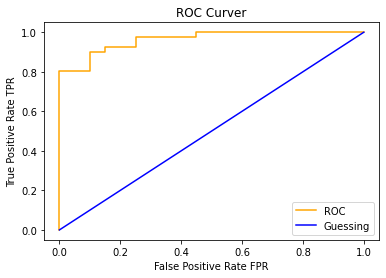

In [103]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    Plots an ROC curve given FPR and TPR
    """
    plt.plot(fpr,tpr,color="orange",label = "ROC")
    plt.plot([0,1],[0,1],color="blue",label = 'Guessing')
    plt.xlabel("False Positive Rate FPR")
    plt.ylabel("True Positive Rate TPR")
    plt.title('ROC Curver')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [104]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9634146341463415

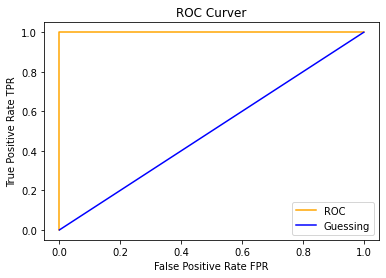

In [105]:
#plot perfect ROC and AUC score
fpr,tpr,threshold = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [106]:
roc_auc_score(y_test,y_test)

1.0

### Confusion Matrix
Quick way to compare the labels the model has predicted and the label it was supposed to predict.
This will tell where the model is getting confused.

In [107]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[17,  3],
       [ 3, 38]], dtype=int64)

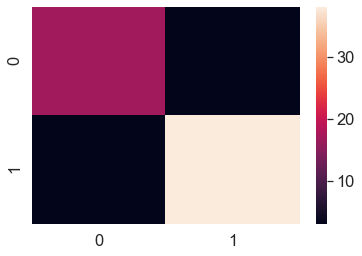

In [108]:
#Visualize confusion matrix with Seaborn's heat map
import seaborn as sns

#font-size
sns.set(font_scale = 1.5)

#create confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)


#plot heatmap
sns.heatmap(conf_mat);


In [109]:
conf_mat

array([[17,  3],
       [ 3, 38]], dtype=int64)

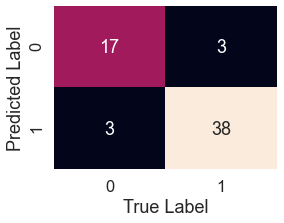

In [110]:
def plot_conf_mat(conf_mat):
    fig,ax = plt.subplots(figsize = (4,3))
    ax = sns.heatmap(conf_mat,
                  annot = True,
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(conf_mat)

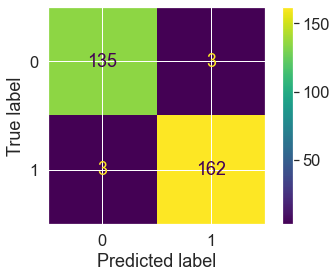

In [111]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X,y);

#### Classsifcation Report

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.93      0.93      0.93        41

    accuracy                           0.90        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.90      0.90        61



In [113]:
#precision and recall become valuable
disease = np.zeros(1000)
disease[10]  = 1    #only one positive
disease_preds = np.zeros(1000)     #model predicts every case as zero

pd.DataFrame(classification_report(disease,disease_preds,output_dict=True))

C:\Users\muham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


### Regression Model Evaluating Matrix

1. R^2 (R-squared) or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

In [114]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### R-Squared

what R-squared does?
Compares the predictions of your model, Values can Range form -ive infinity(very poor) to 1(excellent). if the model predicts all values equal to mean of target so R2 value will be 0.
If your model perfectly predicts a range of numbers then then the R2 will be 1.

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(9)
x = boston_df.drop('target',axis = 1)
y = boston_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.8791753842083332

In [116]:
from sklearn.metrics import r2_score

#fill an array with mean of y_test
y_test_mean = np.full(len(y_test),y_test.mean())

y_test_mean

array([22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60

In [117]:
r2_score(y_test,y_test_mean)

0.0

In [118]:
r2_score(y_test,y_test)

1.0

#### Mean Absolute Error (MAE)

MAE is the average of the absolute differnces between actual values and predicted values. It gives an idea of how wrong our predicted values are.

In [119]:
y_preds = model.predict(x_test)

In [120]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_preds)
mae

2.4057941176470594

In [121]:
df = pd.DataFrame(data = {'Actual Value':y_test,
                          'Predicted value':y_preds})
df['Difference'] = df["Predicted value"]-df['Actual Value']
df

,Actual Value,Predicted value,Difference
464,21.4,21.800,0.400
419,8.4,13.931,5.531
277,33.1,29.985,-3.115
491,13.6,16.501,2.901
337,18.5,19.997,1.497
...,...,...,...
34,13.5,14.844,1.344
335,21.1,20.578,-0.522
159,23.3,28.018,4.718
89,28.7,33.959,5.259


#### Mean Squared Error (MSE)


In [122]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

12.225875892156862

In [123]:
df['squared'] = df['Difference']*df['Difference']

In [124]:
df['squared'].mean()

12.225875892156864

### 2. Using `Scoring` Parameter

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(4)

x = heart_disease.drop(['target'],axis = 1)
y = heart_disease['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

clf= RandomForestClassifier()
clf.fit(x_train,y_train);

clf.score(x_test,y_test)

0.8852459016393442

In [126]:
np.random.seed(3)
cv_acc = cross_val_score(clf,x,y,cv = 5)
cv_acc

array([0.83606557, 0.90163934, 0.78688525, 0.8       , 0.76666667])

In [127]:
print(f"The cross validated accuracy is {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is 81.83%


In [128]:
np.random.seed(3)
#previously scoring = none
cv_acc = cross_val_score(clf,x,y,cv = 5,scoring ='accuracy')
print(f"The cross validated accuracy is {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is 81.83%


In [129]:
np.random.seed(3)
#previously scoring = none
cv_acc = cross_val_score(clf,x,y,cv = 5,scoring ='precision')
print(f"The cross validated Precision is {np.mean(cv_acc)*100:.2f}%")

The cross validated Precision is 82.46%


In [130]:
np.random.seed(3)
#previously scoring = none
cv_acc = cross_val_score(clf,x,y,cv = 5,scoring ='recall')
print(f"The cross validated Recall is {np.mean(cv_acc)*100:.2f}%")

The cross validated Recall is 85.45%


In [131]:
np.random.seed(3)
#previously scoring = none
cv_acc = cross_val_score(clf,x,y,cv = 5,scoring ='f1')
print(f"The cross validated F1 is {np.mean(cv_acc)*100:.2f}%")

The cross validated F1 is 83.72%


In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(5)

x = boston_df.drop(['target'],axis = 1)
y = boston_df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [133]:
#by default in cross val and in socre() the scoring parameter ins r2
np.random.seed(2)
cv = cross_val_score(model,x,y,cv = 5,scoring =None)
print(f"The cross validated accuracy is {np.mean(cv)*100:.2f}%")

cv_r2 = cross_val_score(model,x,y,cv = 5,scoring ='r2')
print(f"The cross validated accuracy is {np.mean(cv_r2)*100:.2f}%")

The cross validated accuracy is 63.98%
The cross validated accuracy is 63.11%


To check 'neg' in MEA and MSE see documentation. Lower are better

In [134]:
cv_mae = cross_val_score(model,x,y,cv = 5,scoring ='neg_mean_absolute_error')
print(f"The cross validated MAE is {np.mean(cv_mae)*100:.2f}%")

The cross validated MAE is -299.44%


In [135]:
cv_mae = cross_val_score(model,x,y,cv = 5,scoring ='neg_mean_squared_error')
print(f"The cross validated MSE is {np.mean(cv_acc)*100:.2f}%")

The cross validated MSE is 83.72%


### 3. Metric Functions

In [137]:
from sklearn.metrics import precision_score,recall_score, f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(56)

x = heart_disease.drop('target',axis = 1)
y = heart_disease['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [151]:
#making precictions
y_preds = clf.predict(x_test)
#evaluating classifier

print('Classifier Metrics on test set');
print(f"Accuracy: \t{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: \t{precision_score(y_test,y_preds)*100:.2f}%")
print(f"Recall: \t{recall_score(y_test,y_preds)*100:.2f}%")
print(f"f1: \t\t{f1_score(y_test,y_preds)*100:.2f}%")

Classifier Metrics on test set


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(5)

x = boston_df.drop('target',axis = 1)
y = boston_df['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
#make predictions
y_preds  = model.predict(x_test)


In [162]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#evaluating classifier

print('Regression Metrics on test set')
print(f"R2 Score: \t{r2_score(y_test,y_preds)}")
print(f"MAE: \t\t{mean_absolute_error(y_test,y_preds)}")
print(f"MSE: \t\t{mean_squared_error(y_test,y_preds)}")

Regression Metrics on test set
R2 Score: 	0.8716632849053344
MAE: 		2.139941176470587
MSE: 		10.047977921568611


# 5. Improving a ML Model

First Model -> Baseline Model
Frist prediction -> Baseline Prediction

From Data Perspective
* Could we collect more data (More the data is, the better)
* Could we imporove our data

From a Model Perspective
* Is there a better Model we could Use?( Sklearn ML Map)
* Could we imporve the current model? (Hyperparameters)
    * Parameters = Model Finds in the data
    * Hyperparameters = Settings on Model you can adjust to (potentially) imporve the ability to find patterns.
    
    
**Three ways to imporve a model.**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [163]:
#importing model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#finding the hyperparameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Documentation says these are paramters, this is because we can pass each of these while instantiating the mode as parameters. In actual these are Hyperparameters.

### 5.1 Improving Model By hand


Let's make three sets:
1. Training
2. Validation
3. Test

We're going to try and adjust following.
1. `max_depth`
2. `max_features`
3. `min_samples_leaf`
4. `min_samples_split`
5. `n_estimators`

In [186]:
def evaluate_metrics(y_true,y_preds):
    """
    Performs Evaluation Comparison on y_true labesl VS y_preds labels on a classification model.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    
    return_dict = {'Accuracy':round(accuracy,2),
                   'Precision':round(precision,2),
                   'Recall':round(recall,2),
                   'F1':round(f1,2)}
    print('Classifier Metrics on test set');
    print(f"Accuracy: \t{accuracy_score(y_true,y_preds)*100:.2f}%")
    print(f"Precision: \t{precision_score(y_true,y_preds)*100:.2f}%")
    print(f"Recall: \t{recall_score(y_true,y_preds)*100:.2f}%")
    print(f"f1: \t\t{f1_score(y_true,y_preds)*100:.2f}%")

    return return_dict

In [265]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(8)
#shuffle the data
heart_disease_shuffle = heart_disease.sample(frac = 1)
#splitting into train,valid,test set
x = heart_disease_shuffle.drop('target',axis = 1)
y = heart_disease_shuffle['target']

train_split = round(0.7*len(heart_disease_shuffle))
valid_split = round(train_split + 0.15*len(heart_disease_shuffle))

x_train,y_train = x[:train_split],y[:train_split]
x_valid, y_valid = x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test  = x[valid_split:],y[valid_split:]

clf = RandomForestClassifier()
clf.fit(x_train,y_train)


#Making Baseline Predictions
y_preds = clf.predict(x_valid)

#Evaluating Classifier metris on baseline prediction

baseline_metrics =evaluate_metrics(y_valid,y_preds) 
baseline_metrics

Classifier Metrics on test set
Accuracy: 	88.89%
Precision: 	87.50%
Recall: 	91.30%
f1: 		89.36%


{'Accuracy': 0.89, 'Precision': 0.88, 'Recall': 0.91, 'F1': 0.89}

In [242]:
#setting hyperparameters and making second classifier
clf_2 = RandomForestClassifier(n_estimators = 200,min_samples_leaf=4)
clf_2.fit(x_train,y_train)


#Making Baseline Predictions
y_preds2 = clf_2.predict(x_valid)

#Evaluating Classifier metris on baseline prediction

clf_2_metrics =evaluate_metrics(y_valid,y_preds2) 
clf_2_metrics

Classifier Metrics on test set
Accuracy: 	93.33%
Precision: 	88.46%
Recall: 	100.00%
f1: 		93.88%


{'Accuracy': 0.93, 'Precision': 0.88, 'Recall': 1.0, 'F1': 0.94}

In [246]:
#setting hyperparameters and making second classifier
clf_3 = RandomForestClassifier(max_depth = 200)
clf_3.fit(x_train,y_train)


#Making Baseline Predictions
y_preds3 = clf_3.predict(x_valid)

#Evaluating Classifier metris on baseline prediction

clf_3_metrics =evaluate_metrics(y_valid,y_preds3) 
clf_3_metrics

Classifier Metrics on test set
Accuracy: 	86.67%
Precision: 	84.00%
Recall: 	91.30%
f1: 		87.50%


{'Accuracy': 0.87, 'Precision': 0.84, 'Recall': 0.91, 'F1': 0.87}

#### 5.1.2 RandomizedSearchCV

In [248]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth" : [None,5,10,20,30],
        "max_features":['auto','sqrt'],
        "min_samples_leaf":[1,2,4],
        "min_samples_split":[2,4,5]
       }


np.random.seed(9)

#split into x and y

x = heart_disease_shuffle.drop('target',axis =1)
y = heart_disease_shuffle['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

clf = RandomForestClassifier(n_jobs = 1)

#setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator = clf,
                           param_distributions = grid,
                           n_iter = 50,
                           cv = 5,
                           verbose = 2)
#fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   4.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   5.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; tota

[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   4.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   3.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   4.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, ma

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=10, max_features=auto, min

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=s

In [249]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [250]:
#make predictions with best hyperparameters
rs_y_preds = rs_clf.predict(x_test)
#evaluate metrics
rs_metrics = evaluate_metrics(y_test,rs_y_preds)

Classifier Metrics on test set
Accuracy: 	75.41%
Precision: 	80.77%
Recall: 	67.74%
f1: 		73.68%


#### Hyperparameters Tuning with GridSearchCV  
We passed an argument `n_iter` in RandomizedSearchCV that it is the number of parameter settings that will be tried. But here every possible combination will be tried.

In [251]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 5]}

In [252]:
grid_2 = {"n_estimators":[10,100,200],
        "max_depth" : [None],
        "max_features":['auto','sqrt'],
        "min_samples_leaf":[4],
        "min_samples_split":[4,6]
       }

In [288]:
from sklearn.model_selection import GridSearchCV
np.random.seed(9)

#split into x and y

x = heart_disease_shuffle.drop('target',axis =1)
y = heart_disease_shuffle['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

clf = RandomForestClassifier(n_jobs = 1)

#setup GridSearchCV

gs_clf = GridSearchCV(estimator = clf,
                           param_grid = grid_2,
                           cv = 5,
                           verbose = 2)
#fit the GridSearchCV version of clf
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_est

In [254]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 100}

In [255]:
#make predictions with best hyperparameters
gs_y_preds = gs_clf.predict(x_test)
#evaluate metrics
gs_metrics = evaluate_metrics(y_test,gs_y_preds)

Classifier Metrics on test set
Accuracy: 	77.05%
Precision: 	77.42%
Recall: 	77.42%
f1: 		77.42%


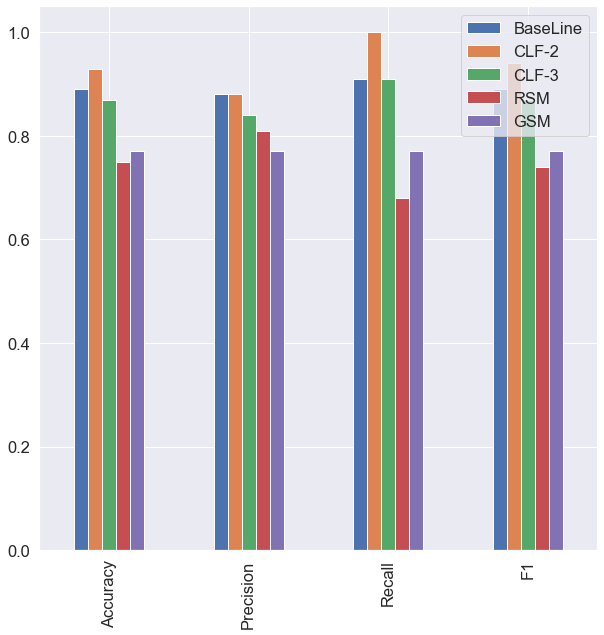

In [256]:
compare_metrics = pd.DataFrame({'BaseLine':baseline_metrics,
                               'CLF-2':clf_2_metrics,
                              'CLF-3':clf_3_metrics,
                              'RSM':rs_metrics,
                              'GSM':gs_metrics})
compare_metrics.plot.bar(figsize=(10,10));

## Saving and Loading Trained ML models.
There are two ways
1. Python `pickel` Module
2. with the `joblib` module

**pickle module**

In [283]:
import pickle

#save to a file
pickle.dump(gs_clf,open('gs_clf.pkl',"wb"))

In [285]:
#load a saved model
loaded_model = pickle.load(open('gs_clf.pkl','rb'))

In [290]:
#previous one
from sklearn.model_selection import GridSearchCV
np.random.seed(9)

#split into x and y

x = heart_disease_shuffle.drop('target',axis =1)
y = heart_disease_shuffle['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

clf = RandomForestClassifier(n_jobs = 1)

#setup GridSearchCV

gs_clf = GridSearchCV(estimator = clf,
                           param_grid = grid_2,
                           cv = 5,
                           verbose = 2)
#fit the GridSearchCV version of clf
gs_clf.fit(x_train,y_train);

#make predictions with best hyperparameters
gs_y_preds = gs_clf.predict(x_test)
#evaluate metrics
gs_metrics = evaluate_metrics(y_test,gs_y_preds)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_est

In [292]:
#loaded one
y_preds = loaded_model.predict(x_test)

In [293]:
evaluate_metrics(y_test,y_preds)

Classifier Metrics on test set
Accuracy: 	77.05%
Precision: 	77.42%
Recall: 	77.42%
f1: 		77.42%


{'Accuracy': 0.77, 'Precision': 0.77, 'Recall': 0.77, 'F1': 0.77}

We can see both models have same results

**Job Lib**

In [295]:
from joblib import load,dump

#save to file
dump(gs_clf,filename = 'gs_clf.joblib')

['gs_clf.joblib']

In [299]:
#import saved model 
loaded_model = load(filename= 'gs_clf.joblib')

In [300]:
l_y_preds  = loaded_model.predict(x_test)

In [301]:
evaluate_metrics(y_test,l_y_preds)

Classifier Metrics on test set
Accuracy: 	77.05%
Precision: 	77.42%
Recall: 	77.42%
f1: 		77.42%


{'Accuracy': 0.77, 'Precision': 0.77, 'Recall': 0.77, 'F1': 0.77}

Again Values are same as original

# 7. Putting All Together